# Exploring data

I highly recommend the book *Statistics for Experimenters (Box & Hunter)*

This classic book has the merit of presenting important ideas and concepts in a clear and concise manner. It is beautifully written, as often were books written in this period.

A lot of learning occurs by studying yield data from an industrial experiment. 

There are 2 sets of data:
* a reference set of 200+ yield data
* an experiment to test whether a modified production process B is better than the current production process A

First we start with the test of process A vs. process B

Text(0.1, 0.1, 'mean: 85.54')

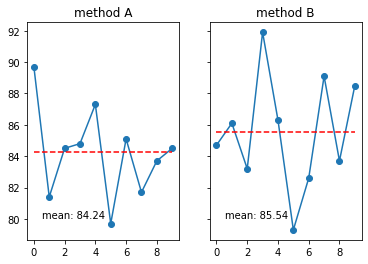

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

y_210 = pd.read_excel('yield 210.xlsx')
y_AB = pd.read_excel('yield 20.xlsx')

#plots the yield data to see what they look like
fig_1, ax_1 = plt.subplots(1,2,sharex = True, sharey = True)
ax_1[0].plot(np.arange(10),y_AB[y_AB['method'] == 'A']['yield'],marker='o')
ax_1[0].plot(np.arange(10),10*[y_AB[y_AB['method'] == 'A']['yield'].mean()],'r--')
ax_1[0].set_title('method A')
ax_1[0].text(0.1, 0.1,'mean: {:.2f}'.format(y_AB[y_AB['method'] == 'A']['yield'].mean()),transform=ax_1[0].transAxes)
ax_1[1].plot(np.arange(10),y_AB[y_AB['method'] == 'B']['yield'],marker='o')
ax_1[1].plot(np.arange(10),10*[y_AB[y_AB['method'] == 'B']['yield'].mean()],'r--')
ax_1[1].set_title('method B') 
ax_1[1].text(0.1, 0.1,'mean: {:.2f}'.format(y_AB[y_AB['method'] == 'B']['yield'].mean()),transform=ax_1[1].transAxes)

As you can see, the means are different: 84.24 for method A vs. 85.54 for method B. We must determine if this difference is statistically significant or not.

Before doing that, let's look at the reference data set. 

[]

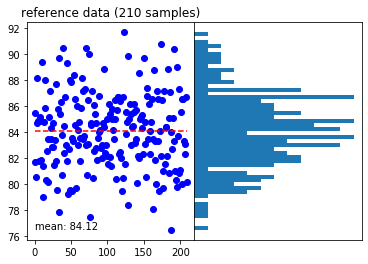

In [6]:
fig_2, ax_2 = plt.subplots(1,2)
plt.subplots_adjust(wspace=0, hspace=0)
ax_2[0].plot(y_210.index.values,y_210['yield'],'bo')
ax_2[0].plot(y_210.index.values,210*[y_210['yield'].mean()],'r--')
ax_2[0].set_title('reference data (210 samples)') 
ax_2[0].text(0.05, 0.05,'mean: {:.2f}'.format(y_210['yield'].mean()),transform=ax_2[0].transAxes)
ax_2[1].hist(y_210['yield'],orientation='horizontal',bins=50)
ax_2[1].set_xticks([])
ax_2[1].set_yticks([])

It is hard to infer much for the data. Left chart shows the time series, with a mean of 84.12. Right chart is a histogram that resembles a bell curve.

I explored the data further by looking at the data autocorrelation to see if the samples are independent. As we will explore later, being able to make an assumption of independence is critical for certain statistical tests.

Text(0.5, 0, 'lag')

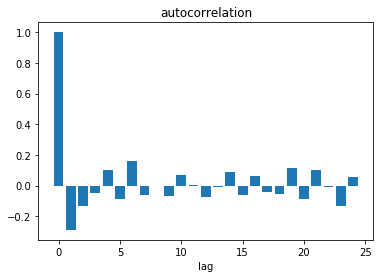

In [7]:
def autocor(data,lag: int):
    ''' assumes lag is always smaller than number of data points
    make sure data input is in numpy array so that arrays are multiplied properly, regardless of index
    '''
    mean = data.mean()
    data_ref = data[:len(data)-lag]
    data_lag = data[lag:]
    data_autocor = ((data_ref - mean)*(data_lag - mean)).sum() / ((data - mean)**2).sum()
    return data_autocor

autocor_vector=[autocor(y_210['yield'].to_numpy(),i) for i in np.arange(0,25,1)]
fig_3,ax_3 = plt.subplots(1,1)
ax_3.bar(np.arange(0,25,1),autocor_vector)
ax_3.set_title('autocorrelation')
ax_3.set_xlabel('lag')

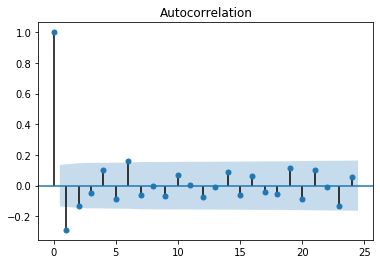

In [11]:
statsmodels.graphics.tsaplots.plot_acf(y_210['yield'].to_numpy());

To the untrained eyes of mine, this data does not appear very auto-correlated. To be sure, I checked it using the acf function of the statsmodels package. Only lag 1 shows statistical significance by sitting outside of confidence interval. 